# 다음 분기에 어떤 게임을 설계해야 할까?
# 어떤 게임을 만들고 싶은가?

- 알아보고자 하는 것
    - 지역에 따라서 선호하는 게임 장르가 다를까?
    - 연도별 게임의 트렌드가 있을까?
    - 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

- Name : 게임의 이름
- Platform : 게임이 지원되는 플랫폼의 이름
- Year : 게임이 출시된 연도
- Genre : 게임의 장르
- Publisher : 게임을 제작한 회사
- NA_Sales : 북미지역에서의 출고량
- EU_Sales : 유럽지역에서의 출고량
- JP_Sales : 일본지역에서의 출고량
- Other_Sales : 기타지역에서의 출고량

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import random
import math
import re
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
fig = plt.figure(figsize = (15,12))
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
plt.rc('font', family='NanumBarunGothic')

df = pd.read_csv('vgames2.csv',index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16598 non-null  object
 1   Platform     16598 non-null  object
 2   Year         16327 non-null  object
 3   Genre        16548 non-null  object
 4   Publisher    16540 non-null  object
 5   NA_Sales     16598 non-null  object
 6   EU_Sales     16598 non-null  object
 7   JP_Sales     16598 non-null  object
 8   Other_Sales  16596 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


<Figure size 1080x864 with 0 Axes>

In [3]:
print(df[df['Year'].isnull() | df['Genre'].isnull() | df['Publisher'].isnull() | df['Other_Sales'].isnull()].shape)
print(round(359/16598,2))
df = df.dropna(axis=0) #결측치 행이 2% 대 이므로 제거해도 상관없다 판단후 제거
df['Platform'] = df['Platform'].str.replace('2600', 'atari2600') # Platform의 2600데이터는 atari2600인걸로 파악되어 변경
df = df.reset_index(drop=True)
df

(359, 9)
0.02


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16234,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16235,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16236,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16237,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
# int로 변경후 연도수 조정
df = df.astype({'Year':'int'})
def year_replace(x):
  if (x < 23) & (x >= 0):
    return x + 2000
  elif (x <= 99) & (x >= 23):
    return x + 1900
  else:
    return x;

In [5]:
df.Year = df.Year.apply(year_replace)
df.Year.iloc[72:82] # 원본데이터의 75번의 year은 9에서 2009로 변경 완료

72    2009
73    2010
74    1985
75    2000
76    2007
77    2008
78    2005
79    1997
80    1997
81    2003
Name: Year, dtype: int64

In [6]:
# sales의 K값들을 M값의 기준으로 변경하는 사용자정의함수
# K들어간값만 빼서 따로 계산
def has_K(inputString):
  return bool(re.search('K', inputString))
def operation_M(x):
  if x == 0:
    return x
  else:
    return x / 1000
sales_NK = df.NA_Sales.apply(has_K)
sales_EK = df.EU_Sales.apply(has_K)
sales_JK = df.JP_Sales.apply(has_K)
sales_OK = df.Other_Sales.apply(has_K)
NK_sales = df[sales_NK]
EK_sales = df[sales_EK]
JK_sales = df[sales_JK]
OK_sales = df[sales_OK]
NK_sales.NA_Sales = NK_sales.NA_Sales.str.replace('K', '').astype(float)
EK_sales.EU_Sales = EK_sales.EU_Sales.str.replace('K', '').astype(float)
JK_sales.JP_Sales = JK_sales.JP_Sales.str.replace('K', '').astype(float)
OK_sales.Other_Sales = OK_sales.Other_Sales.str.replace('K', '').astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
NK_sales.NA_Sales = NK_sales.NA_Sales.apply(operation_M)
EK_sales.EU_Sales = EK_sales.EU_Sales.apply(operation_M)
JK_sales.JP_Sales = JK_sales.JP_Sales.apply(operation_M)
OK_sales.Other_Sales = OK_sales.Other_Sales.apply(operation_M)
OK_sales.Other_Sales

242      0.01
275      0.00
393      0.03
633      0.03
862      0.01
         ... 
15359    0.00
15378    0.27
15794    0.07
16034    0.00
16232    0.08
Name: Other_Sales, Length: 97, dtype: float64

In [8]:
df.NA_Sales = df.NA_Sales.str.replace('M', '')
df.EU_Sales = df.EU_Sales.str.replace('M', '')
df.JP_Sales = df.JP_Sales.str.replace('M', '')
df.Other_Sales = df.Other_Sales.str.replace('M', '')
# 기존데이터에 업데이트
df['NA_Sales'].update(NK_sales.NA_Sales)
df['EU_Sales'].update(EK_sales.EU_Sales)
df['JP_Sales'].update(JK_sales.JP_Sales)
df['Other_Sales'].update(OK_sales.Other_Sales)
# float으로 변경
df.NA_Sales = df.NA_Sales.astype(float)
df.EU_Sales = df.EU_Sales.astype(float)
df.JP_Sales = df.JP_Sales.astype(float)
df.Other_Sales = df.Other_Sales.astype(float)

In [9]:
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01


In [10]:
# 총판매량 추가
Total_Sales = df.NA_Sales +	df.EU_Sales	+ df.JP_Sales	+ df.Other_Sales
df['Total_Sales'] = Total_Sales
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08


In [11]:
# Platform	Year	Genre	Publisher 그룹확인..
group_Platform = df['Platform'].unique() 
print(len(group_Platform))
print(group_Platform)
group_Year = df['Year'].unique() 
print(len(group_Year))
print(group_Year)
group_Publisher = df['Publisher'].unique() 
print(len(group_Publisher))
group_Publisher
group_Genre = df['Genre'].unique() 
print(len(group_Genre))
group_Genre

31
['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 'atari2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
39
[2008 2009 2010 2005 2011 2007 2001 2003 2006 2014 2015 2002 1997 2013
 1996 2004 2000 1984 1998 2016 1985 1999 1995 1993 2012 1987 1982 1994
 1990 1992 1991 1983 1988 1981 1989 1986 2017 1980 2020]
575
12


array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

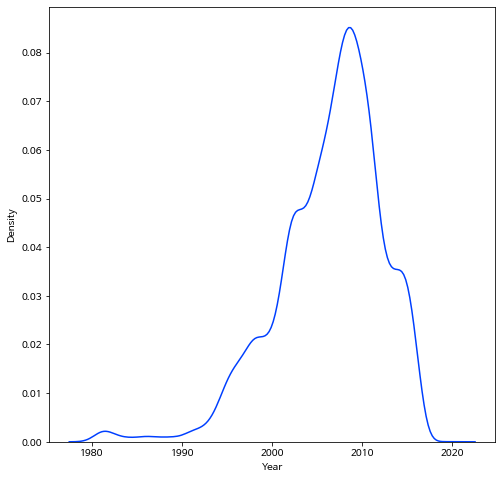

In [12]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.kdeplot('Year', data=df)
plt.show()
# 2000년대와 2010년대로 몰려있는 그래프이다.

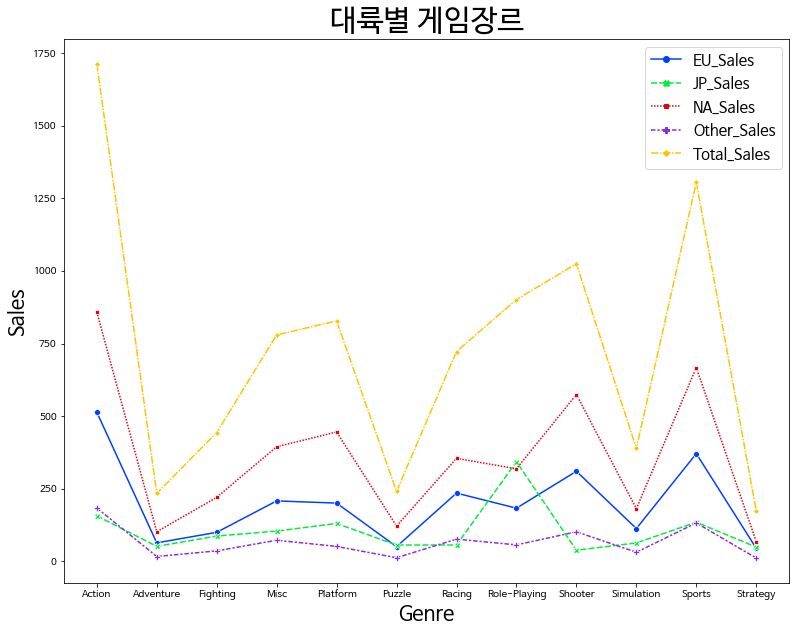

In [13]:
# 대륙별 게임장르 라인플롯
df_genre = df.groupby(by=['Genre'])['Total_Sales'].sum() # 전 대륙 선호하는 게임 장르
df_genre = df_genre.reset_index()

df_genre_na = df.groupby(by=['Genre'])['NA_Sales'].sum() # 북미가 선호하는 게임 장르
df_genre_na = df_genre_na.reset_index()

df_genre_eu = df.groupby(by=['Genre'])['EU_Sales'].sum() # 유럽이 선호하는 게임 장르
df_genre_eu = df_genre_eu.reset_index()

df_genre_jp = df.groupby(by=['Genre'])['JP_Sales'].sum() # 일본이 선호하는 게임 장르
df_genre_jp = df_genre_jp.reset_index()

df_genre_ot = df.groupby(by=['Genre'])['Other_Sales'].sum() # 북미유럽일본제외 선호하는 게임 장르
df_genre_ot = df_genre_ot.reset_index()

df_genre = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_ot)
df_genre = df_genre.set_index("Genre")

plt.figure(figsize=(13, 10))
plt.title("대륙별 게임장르", fontsize=30)
plt.xlabel("Genre", fontsize=20)
plt.ylabel("Sales", fontsize=20)
sns.lineplot(data=df_genre, markers=True)
plt.legend(fontsize=15);
# 전체적으로 북미가 가장높고 그 다음으로는 유럽 지역의 게임 판매량이 많다.
# 예외적으로 RPG에서는 일본이 판매량이 가장높다.
# 전체 1위는 액션 2위는 스포츠 3위는 슈팅게임이다.


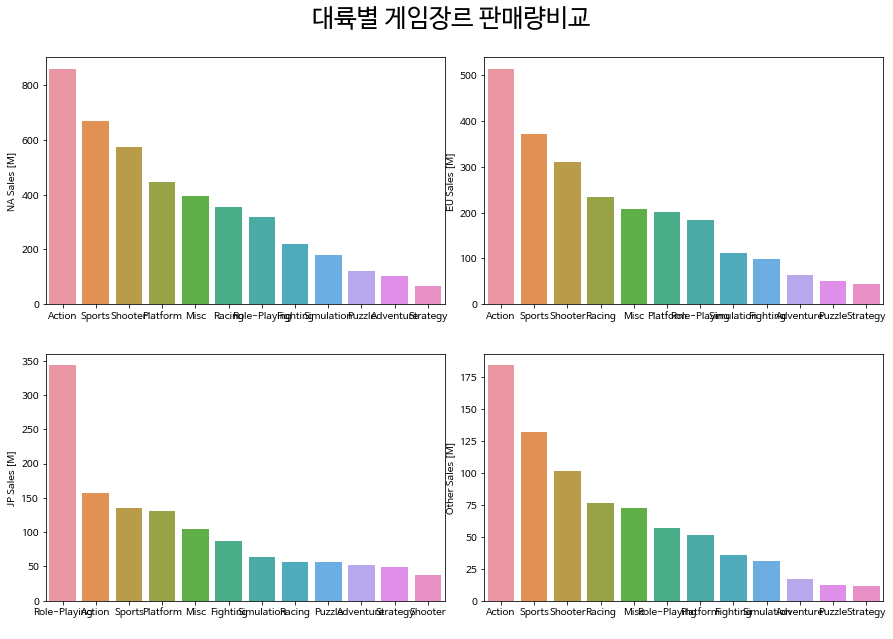

In [14]:
#대륙별 게임장르 바플롯
f, ax = plt.subplots(2,2, figsize=(15, 10))

subset = df.groupby('Genre').sum().sort_values(by='NA_Sales', ascending=False)
genre_order =  subset.index.to_list()
subset = subset.reset_index()
sns.barplot(x = 'Genre', y='NA_Sales', order = genre_order, data=subset, ax=ax[0,0])
ax[0,0].set_ylabel('NA Sales [M]')
ax[0,0].set_xlabel(' ')

subset = df.groupby('Genre').sum().sort_values(by='EU_Sales', ascending=False)
genre_order =  subset.index.to_list()
subset = subset.reset_index()
sns.barplot(x = 'Genre', y='EU_Sales', order = genre_order, data=subset, ax=ax[0,1])
ax[0,1].set_ylabel('EU Sales [M]')
ax[0,1].set_xlabel(' ')

subset = df.groupby('Genre').sum().sort_values(by='JP_Sales', ascending=False)
genre_order =  subset.index.to_list()
subset = subset.reset_index()
sns.barplot(x = 'Genre', y='JP_Sales', order = genre_order, data=subset, ax=ax[1,0])
ax[1,0].set_ylabel('JP Sales [M]')
ax[1,0].set_xlabel(' ')


subset = df.groupby('Genre').sum().sort_values(by='Other_Sales', ascending=False)
genre_order =  subset.index.to_list()
subset = subset.reset_index()
sns.barplot(x = 'Genre', y='Other_Sales', order = genre_order, data=subset, ax=ax[1,1])
ax[1,1].set_ylabel('Other Sales [M]')
ax[1,1].set_xlabel(' ')

f.suptitle('대륙별 게임장르 판매량비교', fontsize=25, y=0.95)
plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

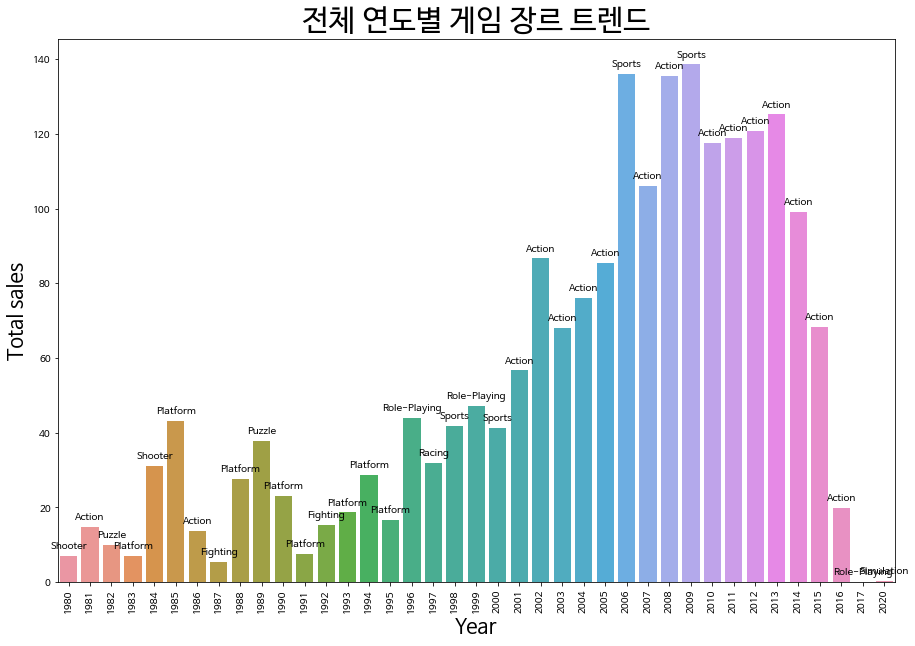

In [15]:
year_sale_dx = df.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_dx['Total_Sales'] # 각연도 별 최대값 
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

genre = year_sale_max['Genre']

plt.figure(figsize=(15, 10))
B = sns.barplot(x='Year', y='Total_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Total_Sales']:
    B.text(index, value + 2, str(genre[index]), color='black', size=10, ha="center")
    index += 1
plt.title("전체 연도별 게임 장르 트렌드", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total sales", fontsize=20)

plt.xticks(rotation=90)
plt.show()

In [16]:
sales_top = df[['Name', 'Year', 'Genre','Publisher', 'Total_Sales']]
sales_top = sales_top.sort_values(by=['Total_Sales'], ascending=False)
sales_top = sales_top.head(15)
sales_top = sales_top.reset_index(drop=True)
sales_top

,Name,Year,Genre,Publisher,Total_Sales
0,Wii Sports,2006,Sports,Nintendo,82.74
1,Super Mario Bros.,1985,Platform,Nintendo,40.24
2,Mario Kart Wii,2008,Racing,Nintendo,35.83
3,Wii Sports Resort,2009,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,Nintendo,31.38
5,Tetris,1989,Puzzle,Nintendo,30.26
6,New Super Mario Bros.,2006,Platform,Nintendo,30.01
7,Wii Play,2006,Misc,Nintendo,29.01
8,New Super Mario Bros. Wii,2009,Platform,Nintendo,28.61
9,Duck Hunt,1984,Shooter,Nintendo,28.31


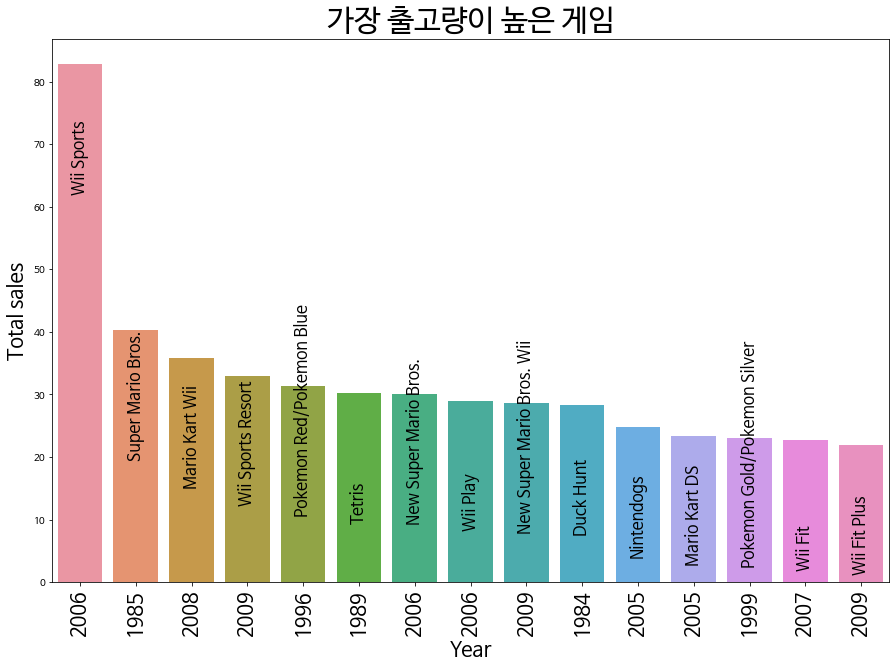

In [17]:
name = sales_top['Name']
year = sales_top['Year']
y = np.arange(0, 15)

plt.figure(figsize=(15, 10))
Z = sns.barplot(x='Name', y='Total_Sales', data=sales_top)
index = 0
for value in sales_top['Total_Sales']:
    Z.text(index, value - 20, name[index], color='#000', size=16, rotation= 90, ha="center")
    index += 1

plt.xticks(y, sales_top['Year'], fontsize=20, rotation=90)
plt.title("가장 출고량이 높은 게임", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total sales", fontsize=20)
plt.show()

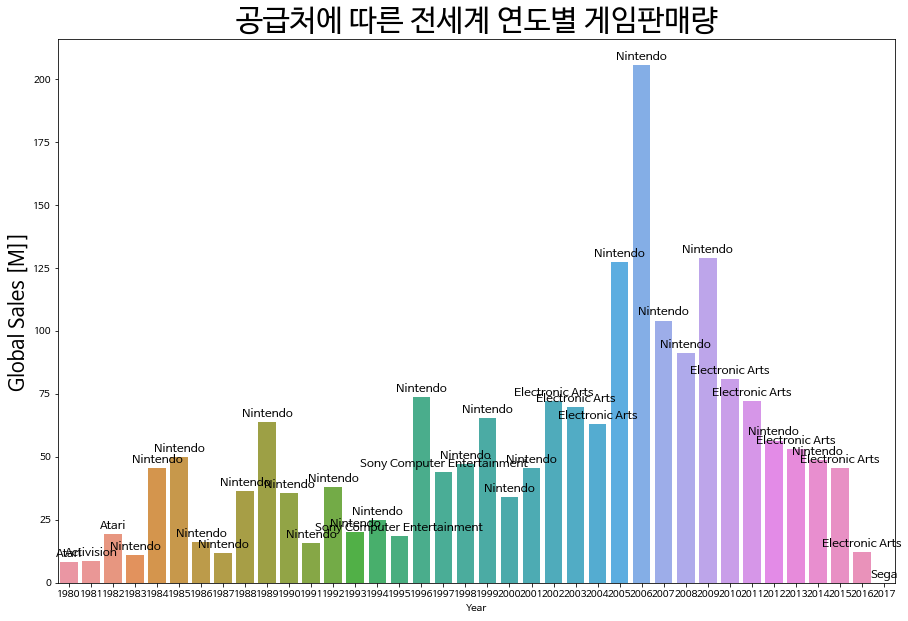

In [18]:
# Publisher 연도별 분석
year_list = []
pub_list = []
sale_list = []

subset_year_pub =  df.groupby(['Year','Publisher']).sum()['Total_Sales'].reset_index()

for i in range(1980, 2018) :
    year_pub = subset_year_pub[subset_year_pub['Year'] == i].sort_values(by='Total_Sales',ascending=False).reset_index(drop=True)

    best_pub = year_pub.loc[0, 'Publisher']
    best_pub_sale =  year_pub.loc[0, 'Total_Sales']

    year_list.append(i)
    pub_list.append(best_pub)
    sale_list.append(best_pub_sale)
    
year_pub = pd.DataFrame((zip(year_list, pub_list, sale_list)), columns = ['Year', 'Publisher', 'Total_Sales'])
fig, ax = plt.subplots(figsize=(15, 10))
bar = sns.barplot(x='Year', y='Total_Sales', data=year_pub)

for index, row in year_pub.iterrows():
    plt.text(index , row.Total_Sales + 2, str(row.Publisher), color='black', ha="center", size=12)

plt.ylabel('Global Sales [M]]', fontsize = 20)
plt.title('공급처에 따른 전세계 연도별 게임판매량', fontsize = 30)
plt.show()